In [5]:
#Importing packages we need
import numpy as np
from numpy import genfromtxt #This is used to loading a csv-file as a numpy array
import matplotlib.pyplot as plt #pyplot is used to plot the data

In [90]:
#Locate my folder
folder='C:/Users/vjule/OneDrive/Dokumenter/skole/Kandidatfag/Financial_econometrics/Undervisning/SV_model_codes/'
data=np.genfromtxt(folder+'SP500.csv', delimiter=',',usecols=np.arange(0,4)) #loading in first 4 columns
y = data[15097:, 3:4]*100 # 100 times log-returns of the S&P 500 index. January 4, 2010 - till end
y=y.T[0,:] #unpacking numpy array
T = len(Y) #length of time series
M = 200 # Number of iterations.
pStar = np.zeros(T) # Smoothed state probabilities.
volStar = np.zeros(T) #Smoothed volatility.
logLik = 0 #Value of EM log-likelihood.
parVec  = np.zeros([M, 3]) # Vector for storing parameters.
likVec  = np.zeros(M)# Vector for storing log likelihoods.

# Initial parameter values.
sigmaH_sq = 2 #Variance for state 1 (= H, h1^2).
sigmaL_sq = 1 #Variance for state 2	(= L, h2^2).
p = 0.5 #Probability for s_t = 1 (=H).

#EM Estimation.
for m in range(M):
    #Reset logLik from previous iteration.
    logLik = 0
    for t in range(T):
        f1 = np.exp(-y[t]**2/(2*sigmaH_sq))/np.sqrt(2*np.pi*sigmaH_sq)#// Density of y_t in state 1.
        f2 = np.exp(-y[t]**2/(2*sigmaL_sq))/np.sqrt(2*np.pi*sigmaL_sq)#// Density of y_t in state 1.
        pStar[t] = (f1*p)/(f1*p+f2*(1-p)) #// Smoothed state probability for time t.
    #"Maximize step (M-step)" - Updating equations.
    sigmaH_sq = np.sum(pStar*y**2)/np.sum(pStar) #// Estimate of sigmaH_sq.
    sigmaL_sq = np.sum((1-pStar)*y**2)/np.sum(1-pStar) # Estimate of sigmaL_sq.
    p = np.sum(pStar)/T # Estimate of p.
    # Compute maximized EM log-likelihood value.
    for t in range(T):
        f1 = np.exp(-y[t]**2/(2*sigmaH_sq))/np.sqrt(2*np.pi*sigmaH_sq)#// Density of y_t in state 1.
        f2 = np.exp(-y[t]**2/(2*sigmaL_sq))/np.sqrt(2*np.pi*sigmaL_sq)#// Density of y_t in state 1.
        pStar[t] = (f1*p)/(f1*p+f2*(1-p)) #// Smoothed state probability for time t.
        logLik = logLik + pStar[t]*(np.log(f1)+np.log(p)) + (1-pStar[t])*(np.log(f2)+np.log(1-p))
        volStar[t] =np.sqrt(sigmaH_sq)*pStar[t] + np.sqrt(sigmaL_sq)*(1-pStar[t])
    #// Save estimates for iteration m.
    parVec[m][0] = sigmaH_sq
    parVec[m][1] = sigmaL_sq
    parVec[m][2] = p
    likVec[m] = logLik


In [91]:
likVec #iterations

array([-2904.11766825, -2822.39692415, -2757.85714208, -2714.02941395,
       -2686.79345231, -2670.57772932, -2660.9939484 , -2655.20097696,
       -2651.5179698 , -2648.99375518, -2647.10248583, -2645.55730658,
       -2644.20309237, -2642.95653121, -2641.77318643, -2640.62955776,
       -2639.51336916, -2638.41833277, -2637.34133576, -2636.28093345,
       -2635.23654488, -2634.20802474, -2633.19543681, -2632.19893481,
       -2631.21870041, -2630.25491164, -2629.30772732, -2628.37727993,
       -2627.46367296, -2626.56698045, -2625.68724782, -2624.8244931 ,
       -2623.97870857, -2623.14986239, -2622.33790026, -2621.5427471 ,
       -2620.76430855, -2620.00247255, -2619.25711073, -2618.52807981,
       -2617.81522285, -2617.11837055, -2616.43734232, -2615.77194747,
       -2615.12198618, -2614.48725049, -2613.86752524, -2613.26258891,
       -2612.67221444, -2612.09617   , -2611.53421968, -2610.98612418,
       -2610.45164144, -2609.93052719, -2609.42253554, -2608.92741943,
      

In [125]:
#Printed estimates and log likelihood value
print('sigma_H='+str(parVec[-1][0]))
print('sigma_L='+str(parVec[-1][1]))
print('p='+str(parVec[-1][2]))
print('loglikelihood function: '+str(likVec[-1]))


sigma_H=2.5485883617979312
sigma_L=0.3485197601598718
p=0.30137281296655644
loglikelihood function: -2591.963286384022


In [92]:
#Compute the switching variable, s_t.
ZeroOnes=np.zeros(T) #State variable
for t in range(T):
    if(pStar[t]>0.5): # If smoothed transition prob. is higher than 50 pct., then set s_t = 1, othereise s_t = 0.
        ZeroOnes[t] = 1

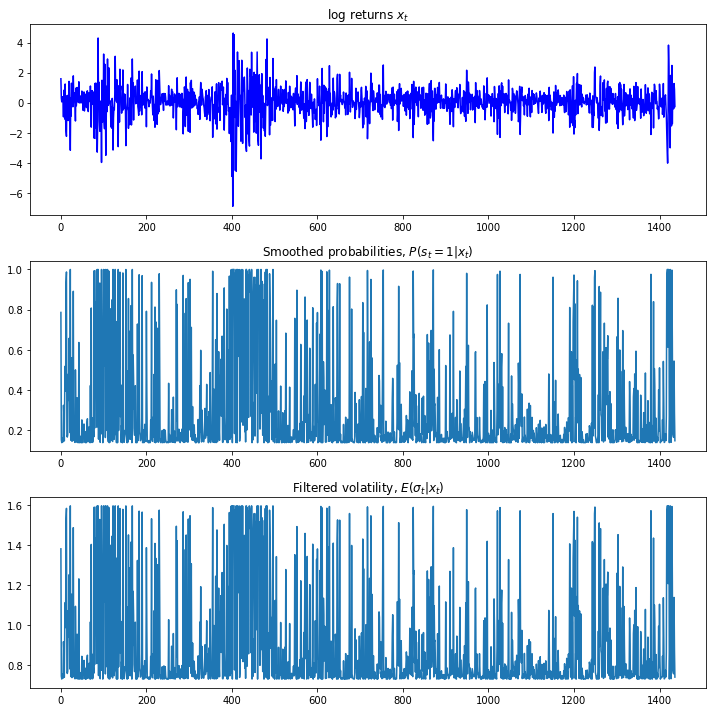

In [97]:
# Graph simulated observations and hidden states.
t=np.arange(0,T)
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].plot(t, y, color='b')
#axs[0].axhline(linewidth=1, color='k')
axs[0].set_title('log returns $x_t$')

axs[1].plot(t, pStar)
axs[1].set_title('Smoothed probabilities, $P(s_t=1|x_t)$')

axs[2].plot(t, volStar)
axs[2].set_title('Filtered volatility, $E(\sigma_t|x_t)$')

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()

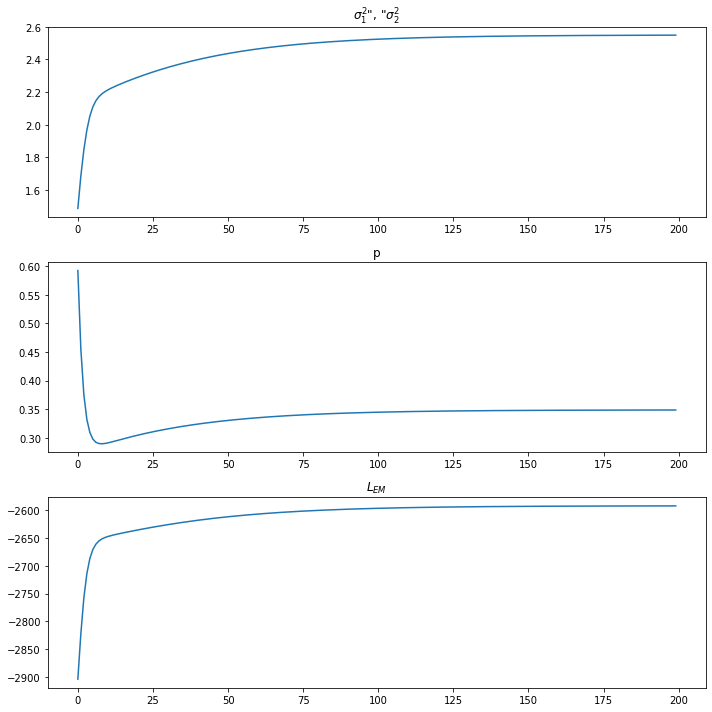

In [118]:
#Graph estimation: parameters and logLik.
m=np.arange(0,M)
fig, axs = plt.subplots(3,figsize=(10,10))
axs[0].plot(m, parVec[:,0])
axs[0].set_title('$\sigma_1^2$", "$\sigma_2^2$')

axs[1].plot(m, parVec[:,1])
axs[1].set_title('p')

axs[2].plot(m, likVec[:])
axs[2].set_title('$L_{EM}$')

fig.tight_layout() # Or equivalently,  "plt.tight_layout()"
plt.show()